In [1]:
# Import dependencies, read in the CSV, and display the dataframe
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

topsters_DF = pd.read_csv("Data/topsters.csv")
topsters_DF.head(10)

,TITLE,ARTIST,YEAR,GENRE,LENGTH,LABEL,COUNTRY,COMPILATION?
0,A Hard Day's Night,The Beatles,1964,Rock,30.15,Parlophone,GBR,N
1,A Rush of Blood to the Head,Coldplay,2002,Alternative,54.13,Parlophone,GBR,N
2,A Sailor's Guide to Life on Earth,Sturgill Simpson,2016,Country,38.90,Atlantic,USA,N
3,Abbey Road,The Beatles,1969,Rock,47.04,Parlophone,GBR,N
4,All Mod Cons,The Jam,1978,Rock,37.76,Polydor,GBR,N
5,Amadjar,Tinariwen,2019,World,62.68,ANTI-,MLI,N
6,Amnesiac,Radiohead,2001,Alternative,43.95,Parlophone,GBR,N
7,Animals,Pink Floyd,1977,Rock,41.70,Harvest,GBR,N
8,Annihilation of the Wicked,Nile,2005,Metal,52.07,Relapse,USA,N
9,At Carnegie Hall,Dave Brubeck,1963,Jazz,105.60,Columbia,USA,N


In [2]:
topsters_DF.tail(10)

,TITLE,ARTIST,YEAR,GENRE,LENGTH,LABEL,COUNTRY,COMPILATION?
200,Yankee Hotel Foxtrot,Wilco,2001,Alternative,51.85,Nonesuch,USA,N
201,You're Dead!,Flying Lotus,2014,Electronic,38.05,Warp,USA,N
202,You're Living All Over Me,Dinosaur Jr.,1987,Alternative,36.13,SST,USA,N
203,Z,My Morning Jacket,2005,Alternative,47.00,ATO,USA,N
204,#1 Record,Big Star,1972,Rock,37.05,Ardent,USA,N
205,3-D THE CATALOGUE,Kraftwerk,2017,Electronic,285.82,Kling Klang,DEU,Y
206,11:11,Rodrigo y Gabriela,2009,World,45.77,Rubyworks,MEX,N
207,Bakesale,Sebadoh,1994,Alternative,41.51,Sub Pop,USA,N
208,Hotel California,Eagles,1976,Rock,43.46,Asylum,USA,N
209,Yoshimi Battles the Pink Robots,The Flaming Lips,2002,Alternative,47.42,Warner Bros.,USA,N


In [3]:
topsters_DF.dtypes

TITLE            object
ARTIST           object
YEAR              int64
GENRE            object
LENGTH          float64
LABEL            object
COUNTRY          object
COMPILATION?     object
dtype: object

In [4]:
# Create a summary dataframe showing the totals for 
albumcount = len(topsters_DF['TITLE'].unique())
artistcount = len(topsters_DF['ARTIST'].unique())
genrecount = len(topsters_DF['GENRE'].unique())
length_total = topsters_DF['LENGTH'].sum()
yearspan = topsters_DF['YEAR'].max() - topsters_DF['YEAR'].min()
nationals = len(topsters_DF['COUNTRY'].unique())
summary = {"Total Number of Albums":albumcount,
                          "Total Number of Artists":artistcount,
                          "Total Genres Represented":genrecount,
                          "Total Minutes of Music": length_total,
                          "Range of Years" : yearspan,
                          "Number of Countries" : nationals}

summary_DF = pd.DataFrame([summary])
summary_DF

,Total Number of Albums,Total Number of Artists,Total Genres Represented,Total Minutes of Music,Range of Years,Number of Countries
0,210,184,18,11861.64,66,19


In [5]:
topsters_DF["YEAR"].value_counts().sort_index()

1955     1
1959     3
1961     1
1963     1
1964     3
1966     2
1967     3
1968     2
1969     5
1970     3
1971     8
1972     2
1973     3
1975     3
1976     1
1977     3
1978     1
1979     1
1980     1
1981     1
1982     1
1983     2
1984     1
1985     2
1986     2
1987     2
1988     1
1989     2
1990     2
1991     5
1992     2
1993     3
1994     8
1995     4
1996     4
1997     6
1998     3
1999     2
2000     4
2001     5
2002     4
2004     6
2005     7
2006     6
2007     6
2008     1
2009     6
2010     8
2011     4
2012     3
2013     5
2014     3
2015     4
2016     8
2017     9
2018     2
2019    10
2020     4
2021     5
Name: YEAR, dtype: int64

In [6]:
# Breakdown albums by decade:
topsters_50s = len(topsters_DF.loc[topsters_DF["YEAR"] < 1960])
topsters_60s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 1960) & (topsters_DF["YEAR"] < 1970)])
topsters_70s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 1970) & (topsters_DF["YEAR"] < 1980)])
topsters_80s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 1980) & (topsters_DF["YEAR"] < 1990)])
topsters_90s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 1990) & (topsters_DF["YEAR"] < 2000)])
topsters_00s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 2000) & (topsters_DF["YEAR"] < 2010)])
topsters_10s = len(topsters_DF.loc[(topsters_DF["YEAR"] >= 2010) & (topsters_DF["YEAR"] < 2020)])
topsters_20s = len(topsters_DF.loc[topsters_DF["YEAR"] > 2020])

decades = {"Decade": ["1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"],
           "Number of Albums": [topsters_50s, topsters_60s, topsters_70s, topsters_80s, 
                                topsters_90s, topsters_00s, topsters_10s, topsters_20s]
            }
           

decades_DF = pd.DataFrame.from_dict(decades)
decades_DF

,Decade,Number of Albums
0,1950s,4
1,1960s,17
2,1970s,25
3,1980s,15
4,1990s,39
5,2000s,45
6,2010s,56
7,2020s,5


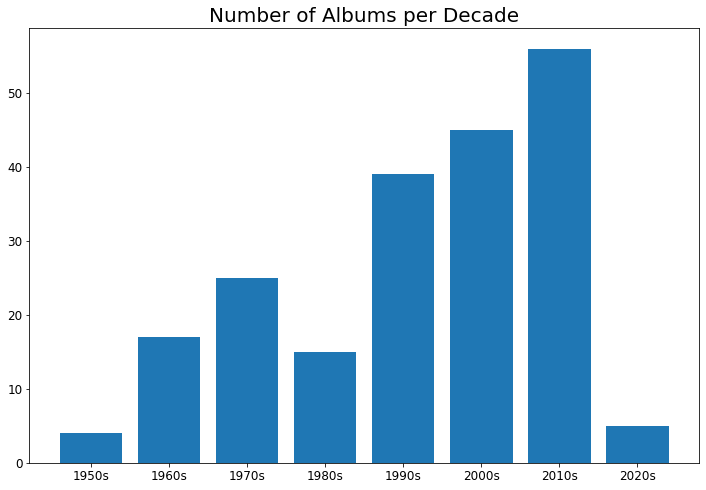

In [7]:
# Visualize the decade breakdown as a bar plot
plt.figure(figsize=(12,8))
plt.bar(decades_DF["Decade"], decades_DF["Number of Albums"])
plt.title("Number of Albums per Decade", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
topsters_DF['GENRE'].value_counts()

Alternative    65
Rock           45
Hip-Hop        22
Electronic     15
Soundtrack     14
Metal          11
Jazz            9
World           8
Pop             6
Soul            5
Folk            2
R&B             2
Spoken Word     1
Classical       1
Reggae          1
Blues           1
Country         1
Compilation     1
Name: GENRE, dtype: int64

In [9]:
topsters_DF.sort_values(by=['GENRE'])

,TITLE,ARTIST,YEAR,GENRE,LENGTH,LABEL,COUNTRY,COMPILATION?
104,Murmur,R.E.M.,1983,Alternative,44.13,I.R.S.,USA,N
142,Silent Alarm,Bloc Party,2005,Alternative,50.60,Wichita,GBR,N
132,Relationship of Command,At the Drive-In,2000,Alternative,53.68,Fearless,USA,N
125,Purple Mountains,Purple Mountains,2019,Alternative,44.42,Drag City,USA,N
124,Preston Family Crest,Night Rally,2006,Alternative,62.66,Diamond Igloo,USA,N
...,...,...,...,...,...,...,...,...
150,Stay Gold,Neon Bunny,2016,World,35.02,West Bridge,KOR,N
144,Sol-Fa,ASIAN KUNG-FU GENERATION,2004,World,46.62,Kioon,JPN,N
133,Remain in Light,Angélique Kidjo,2018,World,36.38,Kravenworks,BEN,N
23,Buena Vista Social Club,Buena Vista Social Club,1997,World,60.22,World Circuit,CUB,N


In [10]:
rap_topsters = topsters_DF.loc[topsters_DF["GENRE"] == "Hip-Hop"]
rap_topsters

,TITLE,ARTIST,YEAR,GENRE,LENGTH,LABEL,COUNTRY,COMPILATION?
10,Atrocity Exhibition,Danny Brown,2016,Hip-Hop,46.80,Warp,USA,N
16,Black Up,Shabazz Palaces,2011,Hip-Hop,36.12,Sub Pop,USA,N
32,DAMN.,Kendrick Lamar,2017,Hip-Hop,55.02,TDE,USA,N
44,Endtroducing….,DJ Shadow,1996,Hip-Hop,63.55,Mo' Wax,USA,N
45,Enter the Wu-Tang (36 Chambers),Wu-Tang Clan,1993,Hip-Hop,58.45,Loud,USA,N
58,"good kid, m.A.A.d city",Kendrick Lamar,2012,Hip-Hop,68.35,TDE,USA,N
67,Illmatic,Nas,1994,Hip-Hop,39.82,Columbia,USA,N
91,Madvillainy,MF DOOM & Madlib,2004,Hip-Hop,46.37,Stones Throw,USA,N
96,Meow the Jewels,Run the Jewels,2015,Hip-Hop,41.98,Mass Appeal,USA,N
101,Modal Soul,nujabes,2005,Hip-Hop,63.52,Hydeout Productions,JPN,N


In [11]:
# Breakdown the national representation of our top albums:
print(f"{nationals} countries represented:")
topsters_DF['COUNTRY'].value_counts()

19 countries represented:


USA    114
GBR     55
JPN     13
AUS      4
CAN      4
DEU      3
KOR      3
FRA      3
NOR      1
JAM      1
CUB      1
ESP      1
MLI      1
BEN      1
ISL      1
POL      1
PAK      1
SYR      1
MEX      1
Name: COUNTRY, dtype: int64

In [12]:
# Locate and retrieve subset of Topsters for albums that came out in 2000 and beyond.
topsters00_DF = topsters_DF.loc[topsters_DF["YEAR"] > 1999]
total_2000s = len(topsters_DF.loc[topsters_DF["YEAR"] > 1999])
print(total_2000s)
topsters00_DF

110


,TITLE,ARTIST,YEAR,GENRE,LENGTH,LABEL,COUNTRY,COMPILATION?
1,A Rush of Blood to the Head,Coldplay,2002,Alternative,54.13,Parlophone,GBR,N
2,A Sailor's Guide to Life on Earth,Sturgill Simpson,2016,Country,38.90,Atlantic,USA,N
5,Amadjar,Tinariwen,2019,World,62.68,ANTI-,MLI,N
6,Amnesiac,Radiohead,2001,Alternative,43.95,Parlophone,GBR,N
8,Annihilation of the Wicked,Nile,2005,Metal,52.07,Relapse,USA,N
...,...,...,...,...,...,...,...,...
201,You're Dead!,Flying Lotus,2014,Electronic,38.05,Warp,USA,N
203,Z,My Morning Jacket,2005,Alternative,47.00,ATO,USA,N
205,3-D THE CATALOGUE,Kraftwerk,2017,Electronic,285.82,Kling Klang,DEU,Y
206,11:11,Rodrigo y Gabriela,2009,World,45.77,Rubyworks,MEX,N


In [13]:
albumcount00 = topsters00_DF['TITLE'].count()
artistcount00 = len(topsters00_DF['ARTIST'].unique())
genrecount00 = len(topsters00_DF['GENRE'].unique())

summary00 = {"Total Number of Albums":albumcount00,
                          "Total Number of Artists":artistcount00,
                          "Total Genres Represented":genrecount00}

summary00_DF = pd.DataFrame([summary00])
print("Summary stats for albums released in 2000s")
summary00_DF

Summary stats for albums released in 2000s


,Total Number of Albums,Total Number of Artists,Total Genres Represented
0,110,100,13


In [14]:
topsters_DF["ARTIST"].unique()

array(['The Beatles', 'Coldplay', 'Sturgill Simpson', 'The Jam',
       'Tinariwen', 'Radiohead', 'Pink Floyd', 'Nile', 'Dave Brubeck',
       'Danny Brown', 'R.E.M.', 'AC/DC', 'Teenage Fanclub',
       'Guided by Voices', 'Muse', 'Shabazz Palaces',
       'Red Hot Chili Peppers', 'Jeff Beck', 'Joni Mitchell',
       'Chikuma Jun', 'Bon Iver', 'The Black Keys',
       'Buena Vista Social Club', 'Duster', 'The Wailers', 'Toro y Moi',
       'Mitsuda Yasunori, Uematsu Nobuo', 'MGMT', 'Vampire Weekend',
       'Best Coast', 'SZA', 'Kendrick Lamar', 'Sonic Youth',
       'The White Stripes', 'Kings of Convenience', 'Gorillaz',
       'Daft Punk', 'Tycho', 'Django Reinhardt & Stephane Grappelli',
       'Portishead', 'Charlie Hunter & Leon Parker', 'Elliott Smith',
       'The Jimi Hendrix Experience', 'DJ Shadow', 'Wu-Tang Clan',
       'The Cinematic Orchestra', 'Jay Som', 'Cornelius', 'Night Tempo',
       'Electronic Arts', 'Uematsu Nobuo', 'Vincent Diamante',
       'Neko Case', 'Yes',

In [15]:
artists_genre = topsters_DF.groupby("GENRE")["ARTIST"].unique()
artists_genre

GENRE
Alternative    [Coldplay, Radiohead, R.E.M., Teenage Fanclub,...
Blues                      [Stevie Ray Vaughan & Double Trouble]
Classical                                [Christopher Parkening]
Compilation                                     [WIRED Magazine]
Country                                       [Sturgill Simpson]
Electronic     [Daft Punk, Tycho, Portishead, The Cinematic O...
Folk                       [Joni Mitchell, Kings of Convenience]
Hip-Hop        [Danny Brown, Shabazz Palaces, Kendrick Lamar,...
Jazz           [Dave Brubeck, Django Reinhardt & Stephane Gra...
Metal          [Nile, Mastodon, Black Sabbath, Iron Maiden, R...
Pop            [Pizzicato Five, Frank Sinatra, Tatsuro Yamash...
R&B                                      [Thundercat, fka twigs]
Reggae                                             [The Wailers]
Rock           [The Beatles, The Jam, Pink Floyd, AC/DC, Red ...
Soul           [SZA, Blood Orange, Gnarls Barkley, Marvin Gay...
Soundtrack     [Chi

In [16]:
# Using .groupby to show how many albums from each genre, from each country, we have:
gen_artists = topsters_DF.groupby("GENRE").count()["ARTIST"]
pd.DataFrame(gen_artists)

,ARTIST
GENRE,
Alternative,65
Blues,1
Classical,1
Compilation,1
Country,1
Electronic,15
Folk,2
Hip-Hop,22
Jazz,9


In [17]:
year_genre = topsters_DF.groupby(["YEAR","GENRE"]).count()["TITLE"]
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(year_genre)

YEAR  GENRE      
1955  Pop            1
1959  Jazz           3
1961  Jazz           1
1963  Jazz           1
1964  Rock           2
      Soul           1
1966  Pop            1
      Rock           1
1967  Rock           3
1968  Rock           2
1969  Jazz           1
      Rock           4
1970  Metal          1
      Rock           2
1971  Folk           1
      Metal          1
      Rock           5
      Soul           1
1972  Rock           2
1973  Reggae         1
      Rock           2
1975  Rock           2
      Spoken Word    1
1976  Rock           1
1977  Rock           3
1978  Rock           1
1979  Rock           1
1980  Rock           1
1981  Rock           1
1982  Pop            1
1983  Alternative    1
      Blues          1
1984  Metal          1
1985  Alternative    1
      Pop            1
1986  Alternative    1
      Metal          1
1987  Alternative    1
      Soundtrack     1
1988  Alternative    1
1989  Hip-Hop        1
      Pop            1
1990  Alternativ

<Axes: xlabel='YEAR'>

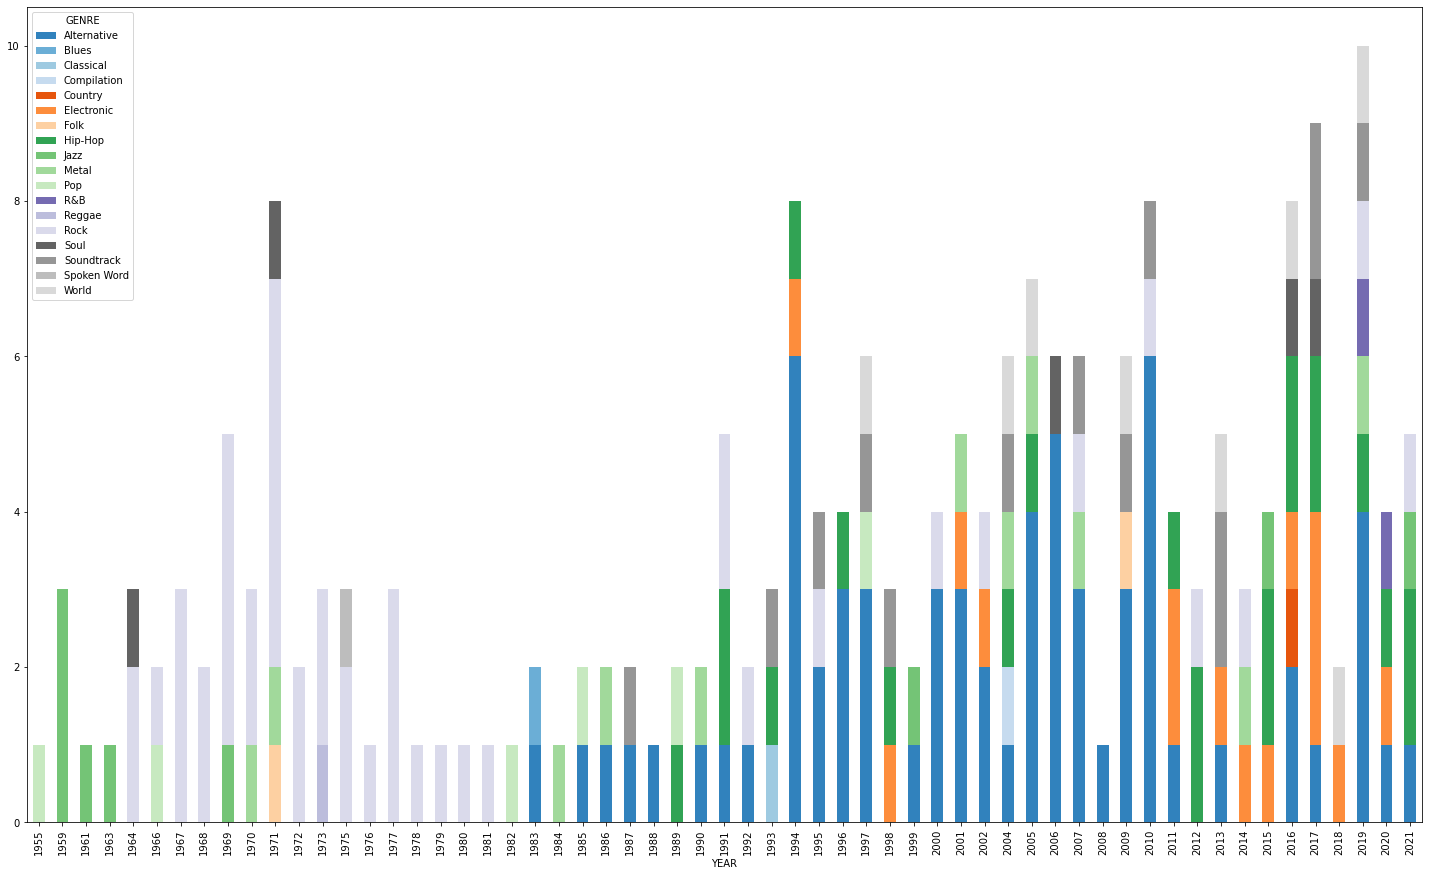

In [18]:
year_genre.unstack().plot(kind='bar',stacked=True, figsize=(25,15), colormap='tab20c')